In [1]:
from sisyphus2.backend.models.basic import Basic, BasicSigmoid, BasicScan
from sisyphus2.backend.models.lstm import LSTM
from sisyphus2.tasks import rdm as rd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
rdm = rd.RDM( dt = 10, tau = 100, T = 2000, N_batch = 128)
gen = rdm.batch_generator()

In [7]:
params = rdm.__dict__

In [8]:
params['name'] = 'model'
params['N_rec'] = 50

In [9]:
model = Basic(params)

In [10]:
model.build()

In [11]:
params['name'] = 'model2'
model2 = Basic(params)
model2.build()

In [12]:
tf.get_default_graph().get_name_scope()

''

In [13]:
model.train(gen, {'save_weights_path': '../weights/refactor_weights.npz', 'training_iters': 5000})

Iter 1280, Minibatch Loss= 0.221302
Iter 2560, Minibatch Loss= 0.192175
Iter 3840, Minibatch Loss= 0.136363
Optimization finished!
Model saved in file: ../weights/refactor_weights.npz


([0.22130165, 0.19217461, 0.13636273], 66.73664498329163, 28.950600147247314)

In [14]:
model2.train(gen, {'save_weights_path': '../weights/refactor_weights.npz', 'training_iters': 5000})

Iter 1280, Minibatch Loss= 0.247264
Iter 2560, Minibatch Loss= 0.228629
Iter 3840, Minibatch Loss= 0.199621
Optimization finished!
Model saved in file: ../weights/refactor_weights.npz


([0.24726443, 0.22862859, 0.19962116], 75.30778980255127, 29.000688076019287)

In [15]:
x,y,m = gen.next()

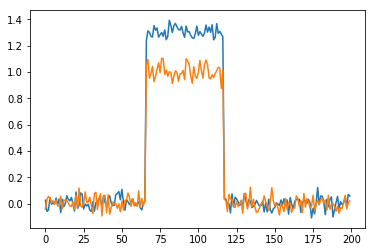

In [16]:
plt.plot(x[0,:,:])

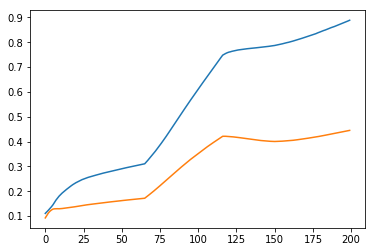

In [17]:
plt.plot(model2.test(x)[0][0,:,:])

In [18]:
model.destruct()

In [19]:
tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)

[]